# TIDAL FIELD EVOLUTION

In [1]:
from loadmodules import *
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

%matplotlib inline

In [10]:
simulation = ['./lvl5_testruns/Au6_lvl5_cfea_fulltensor', './lvl5_testruns/Au6_lvl5_cfea_fiducial']
snapshots = [40, 50, 60, 80, 100, 115, 120, 127]

In [11]:
def get_tidal_field_histogram(simulation, snapshot):
    sf = load_subfind(snapshot, dir=simulation+'/output/', hdf5=True, loadonly=['fpos', 'frc2', 'svel', 'flty', 'fnsh', 'slty', 'spos', 'smty', 'ffsh'] )
    s = gadget_readsnap(snapshot, snappath=simulation+'/output/', subfind=sf, hdf5=True, loadonlyhalo=0)
    s.calc_sf_indizes( sf )
    galrad = 0.1 * sf.data['frc2'][0]
    s.select_halo( sf, use_principal_axis=True, use_cold_gas_spin=False, do_rotation=True )

    print('Redshift of the simulation: {:2.2f}'.format(s.redshift))

    gyr = 1e9 * 365.25 * 24 * 3600
    s.parameters['UnitTime_in_s'] = s.parameters['UnitLength_in_cm'] / s.parameters['UnitVelocity_in_cm_per_s']
    s.data['ttij'] *= gyr**2 / s.parameters['UnitTime_in_s']**2
    if 'tlij' in s.data.keys():
        s.data['tlij'] *= gyr**2 / s.parameters['UnitTime_in_s']**2
    else:
        s.data['tlij'] = np.zeros_like(s.data['ttij'])

    gasparts = s.data['type'] == 0
    starparts = s.data['age'] > 0.
    
    TTij_g = (s.data['ttij']+s.data['tlij'])[gasparts]
    finitemask = np.isfinite(TTij_g)
    TTij_g = TTij_g[finitemask.all(axis=1)]
    r_g = s.r()[gasparts][finitemask.all(axis=1)]
    TTij_s = (s.data['ttij']+s.data['tlij'])[s.data['type']==4][starparts]
    finitemask = np.isfinite(TTij_s)
    TTij_s = TTij_s[finitemask.all(axis=1)]
    r_s = s.r()[s.data['type']==4][starparts][finitemask.all(axis=1)]

    TT_eig_g = np.zeros((len(TTij_g),3))
    TT_eig_s = np.zeros((len(TTij_s),3))

    TT_eig_g = np.linalg.eigvalsh(TTij_g.reshape(len(TTij_g),3,3))
    TT_eig_g = np.sort(TT_eig_g, axis=1)
    TT_eig_s = np.linalg.eigvalsh(TTij_s.reshape(len(TTij_s),3,3))
    TT_eig_s = np.sort(TT_eig_s, axis=1)

    T_str_g = TT_eig_g[:,2] + 1./3. * np.abs(TT_eig_g[:,0] + TT_eig_g[:,1] + TT_eig_g[:,2])
    T_str_s = TT_eig_s[:,2] + 1./3. * np.abs(TT_eig_s[:,0] + TT_eig_s[:,1] + TT_eig_s[:,2])

    fig, ax = plt.subplots(1, 2 ,figsize=(15,7), sharey=True)
    binx = np.linspace(0, galrad*1e3, 100)
    biny = np.linspace(0,20, 100)
    h = ax[0].hist2d(r_s*1e3, np.log10(T_str_s), bins=(binx, biny), cmap='Greys', norm=colors.LogNorm())
    h = ax[1].hist2d(r_g*1e3, np.log10(T_str_g), bins=(binx, biny), cmap='Greys', norm=colors.LogNorm())

    ax[0].set_ylabel(r'$\log_{10}\rm{T}_{\rm{tid}}$ [Gyr$^{-2}$]', fontsize=14)
    ax[0].set_title('Stars', fontsize=14)
    ax[1].set_title('Gas', fontsize=14)

    fig.supxlabel('Radius [kpc]', fontsize=14)
    fig.suptitle(simulation + ', z = {:.2f}'.format(s.redshift), fontsize=16)
    
    fig.subplots_adjust(wspace=0.)
    fig.subplots_adjust(right=0.9)
    cbar_ax = fig.add_axes([0.92, 0.12, 0.02, 0.78])
    fig.colorbar(h[3], cax=cbar_ax)

    plt.tick_params(labelsize=12)
    plt.show()


galrad= 0.01
Found 1624 stars.
Rotated pos.
Rotated bfld.
Rotated vel.
Redshift of the simulation: 6.49


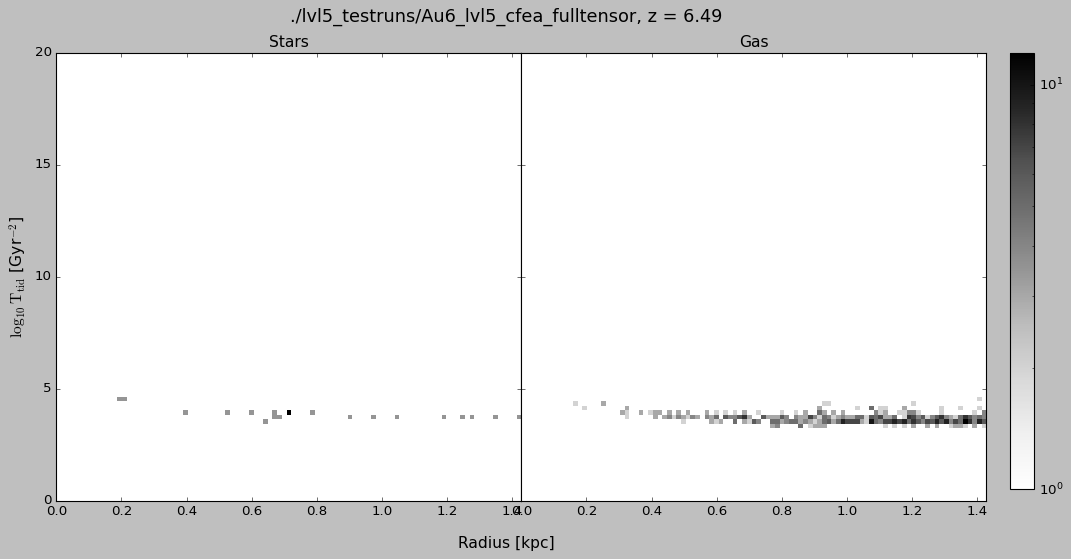

galrad= 0.01
Found 1624 stars.
Rotated pos.
Rotated bfld.
Rotated vel.
Redshift of the simulation: 6.49


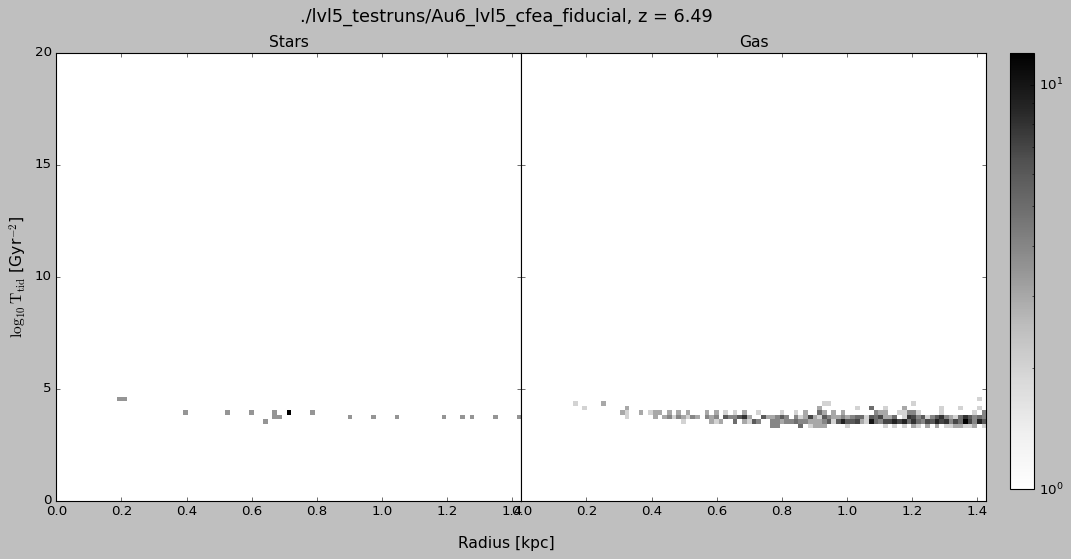

galrad= 0.01
Found 4152 stars.
Rotated pos.
Rotated bfld.
Rotated vel.
Redshift of the simulation: 3.71


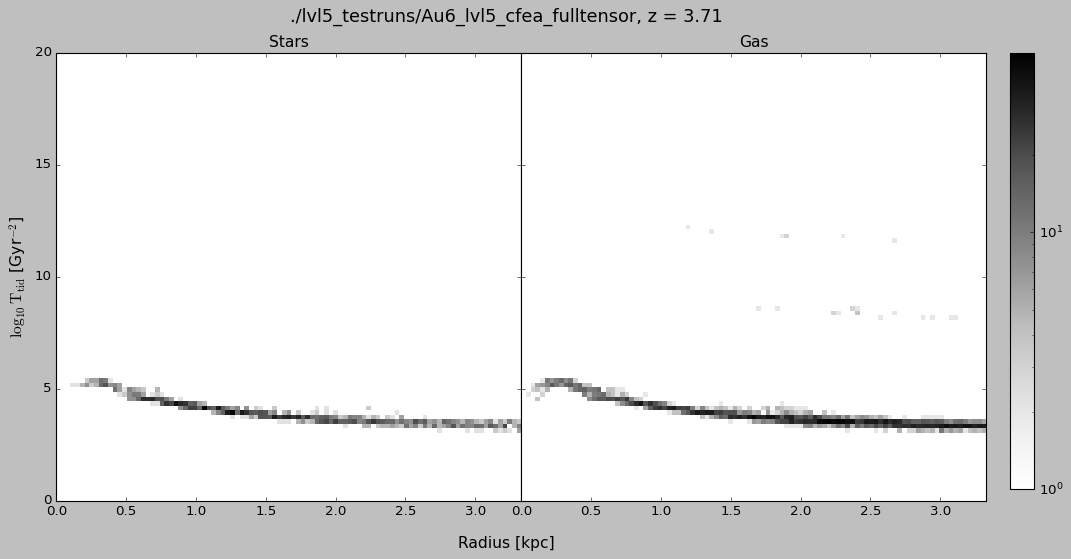

galrad= 0.01
Found 4152 stars.
Rotated pos.
Rotated bfld.
Rotated vel.
Redshift of the simulation: 3.71


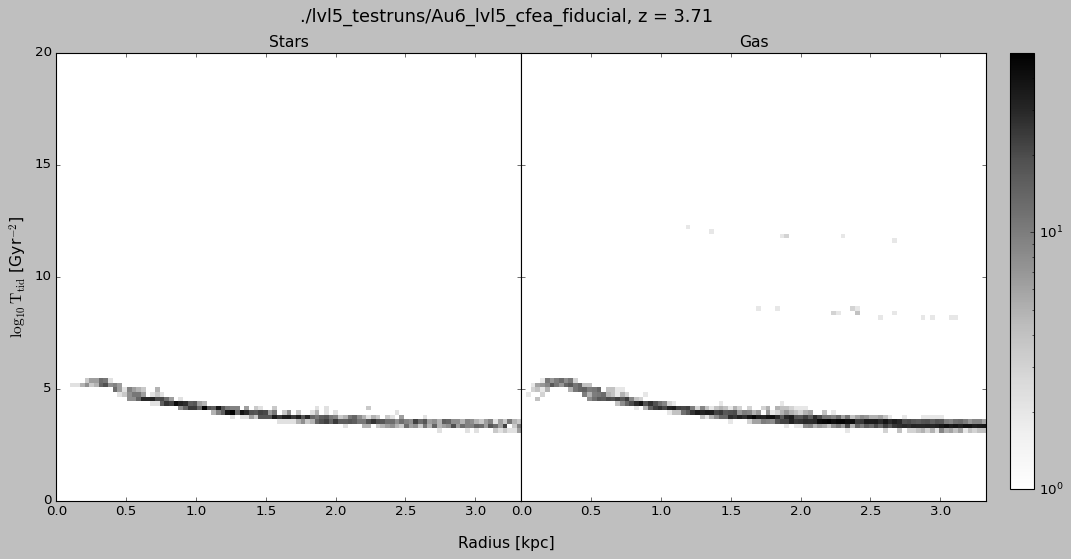

galrad= 0.01
Found 2386 stars.
Rotated pos.
Rotated bfld.
Rotated vel.
Redshift of the simulation: 2.10


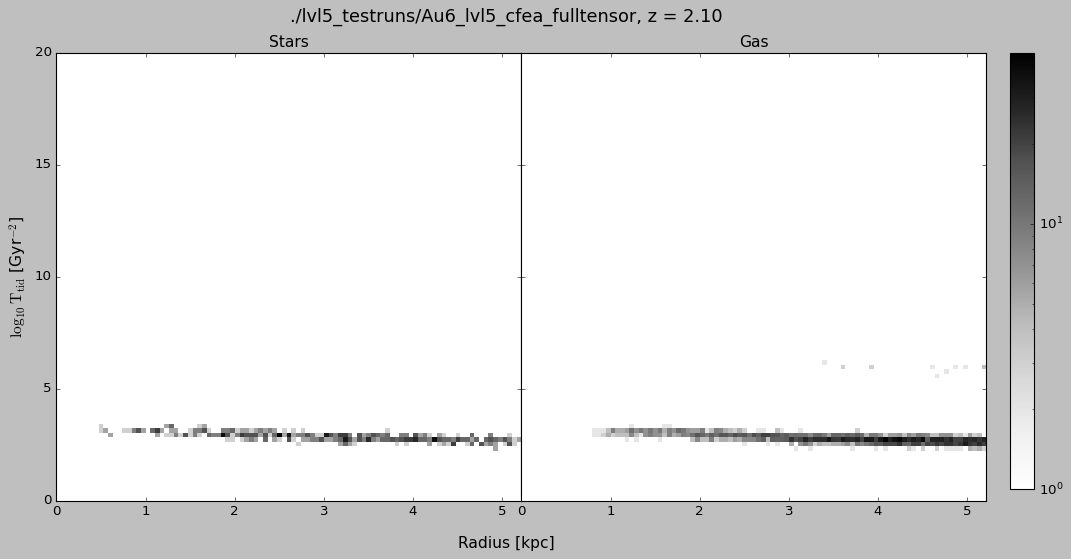

galrad= 0.01
Found 2386 stars.
Rotated pos.
Rotated bfld.
Rotated vel.
Redshift of the simulation: 2.10


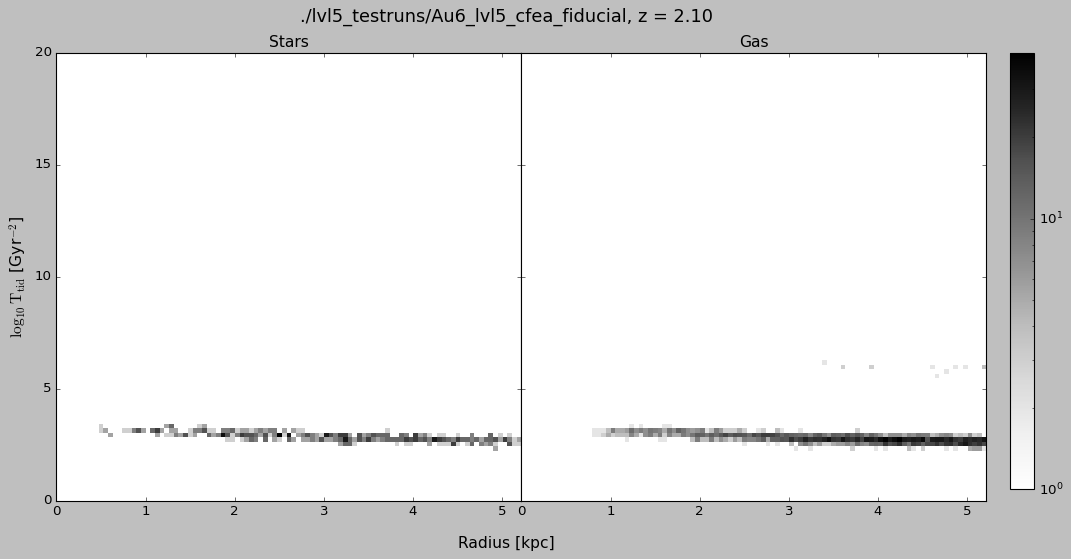

galrad= 0.01
Found 8540 stars.
Rotated pos.
Rotated bfld.
Rotated vel.
Redshift of the simulation: 0.92


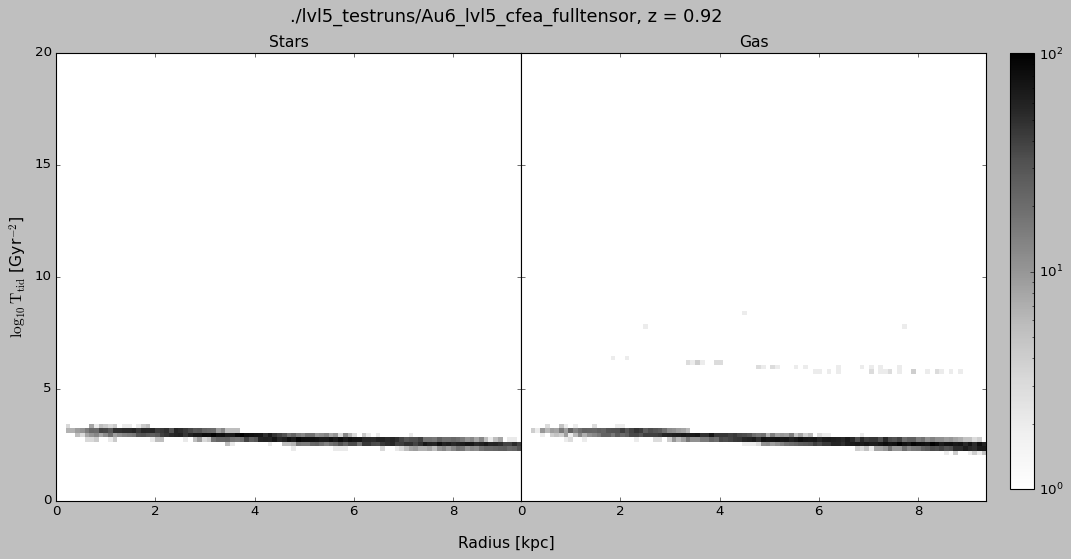

galrad= 0.01
Found 8540 stars.
Rotated pos.
Rotated bfld.
Rotated vel.
Redshift of the simulation: 0.92


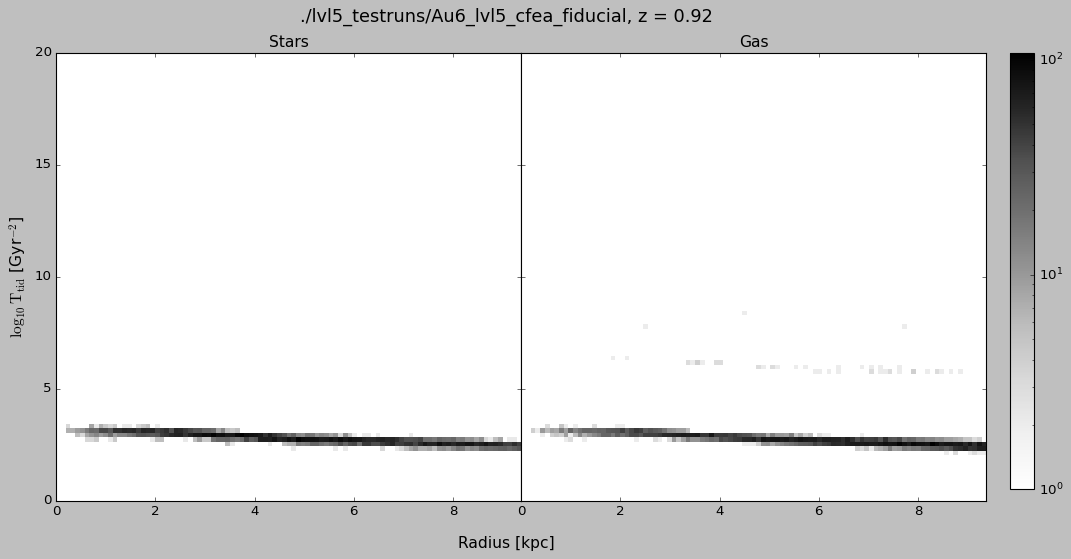

galrad= 0.017008668
Found 22936 stars.
Rotated pos.
Rotated bfld.
Rotated vel.
Redshift of the simulation: 0.40


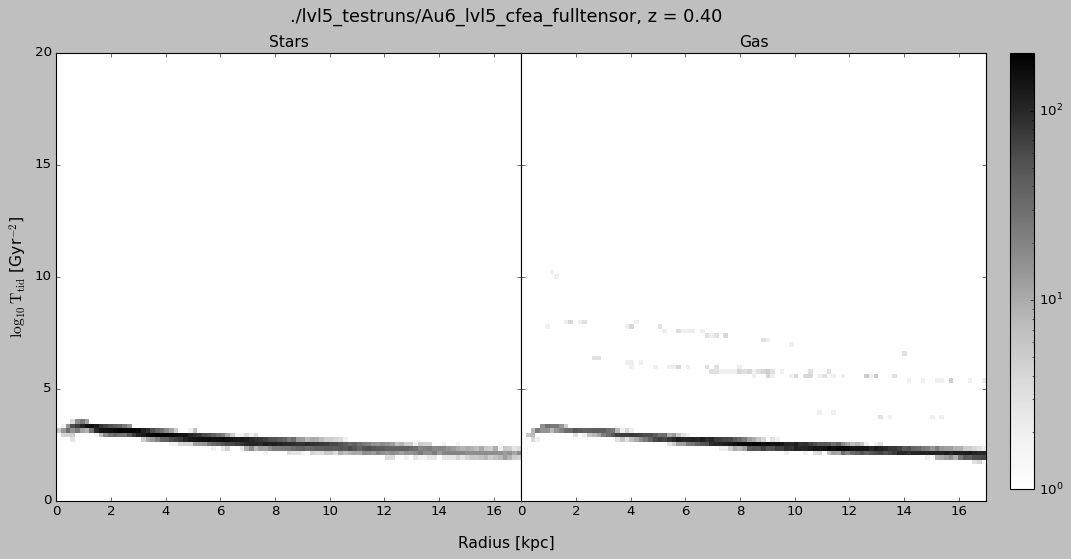

galrad= 0.017008668
Found 22936 stars.
Rotated pos.
Rotated bfld.
Rotated vel.
Redshift of the simulation: 0.40


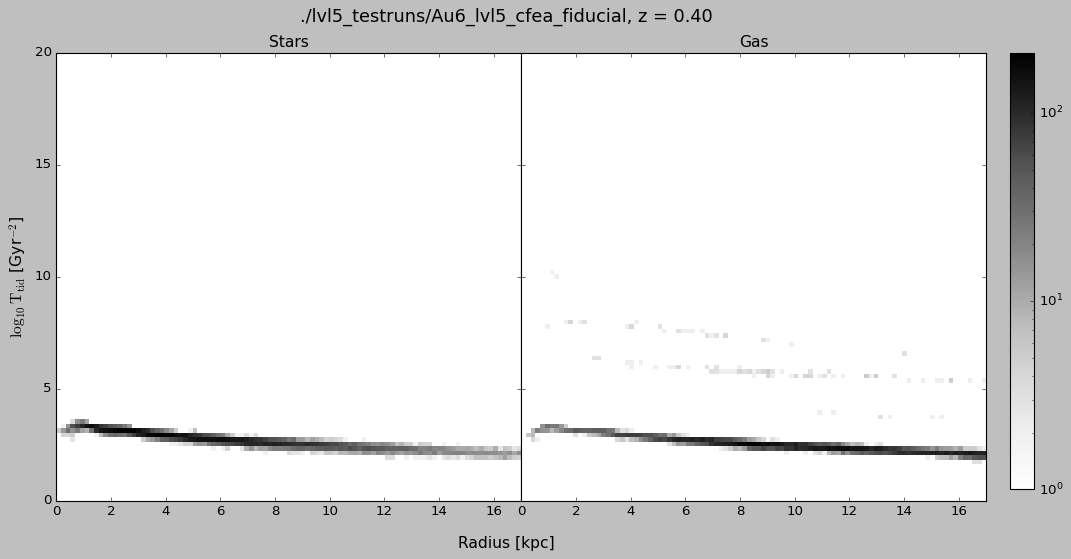

galrad= 0.018771298
Found 64044 stars.
Rotated pos.
Rotated bfld.
Rotated vel.
Redshift of the simulation: 0.15


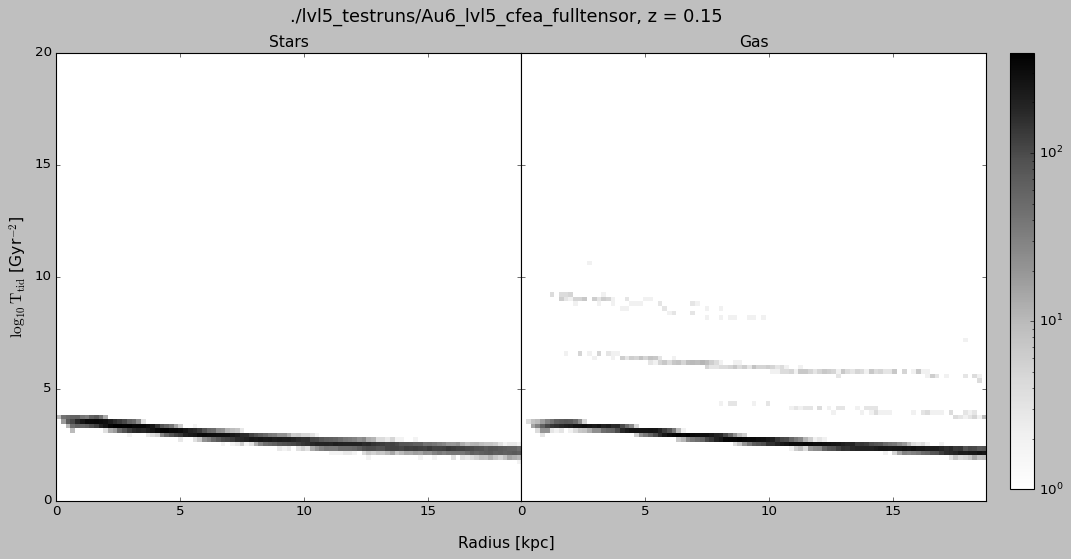

galrad= 0.018771298
Found 64044 stars.
Rotated pos.
Rotated bfld.
Rotated vel.
Redshift of the simulation: 0.15


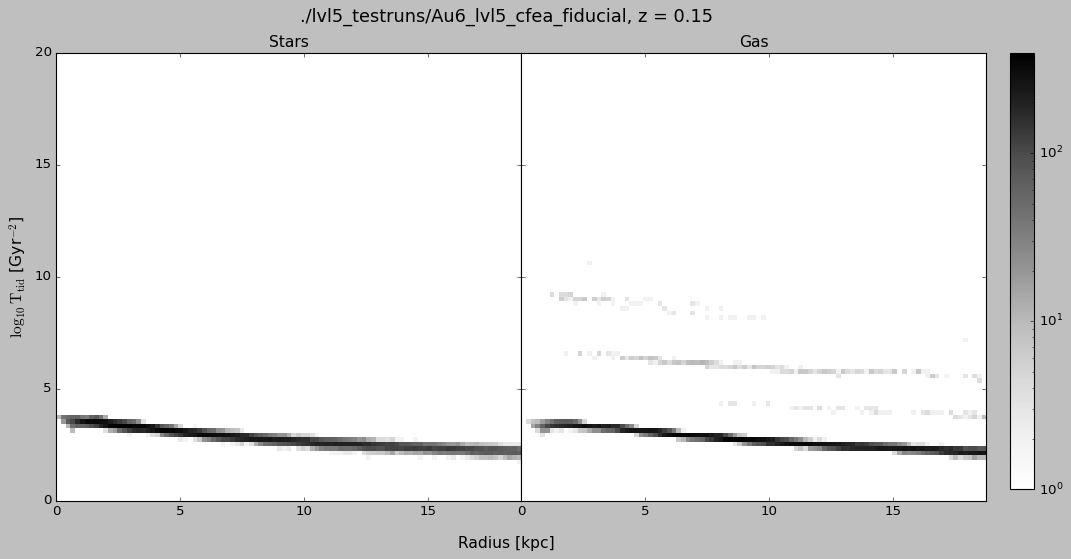

galrad= 0.018882247
Found 70416 stars.
Rotated pos.
Rotated bfld.
Rotated vel.
Redshift of the simulation: 0.08


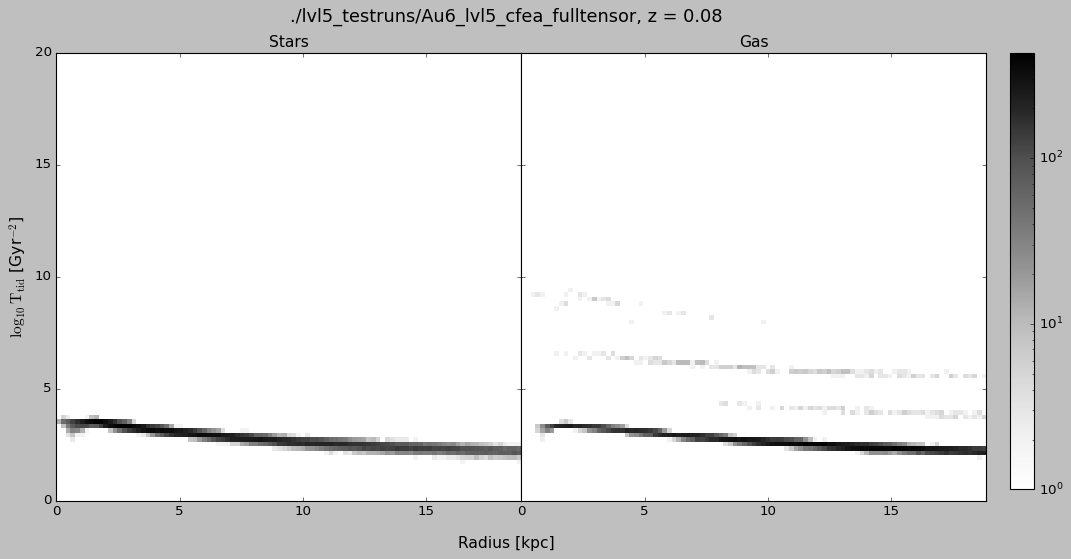

galrad= 0.018882247
Found 70416 stars.
Rotated pos.
Rotated bfld.
Rotated vel.
Redshift of the simulation: 0.08


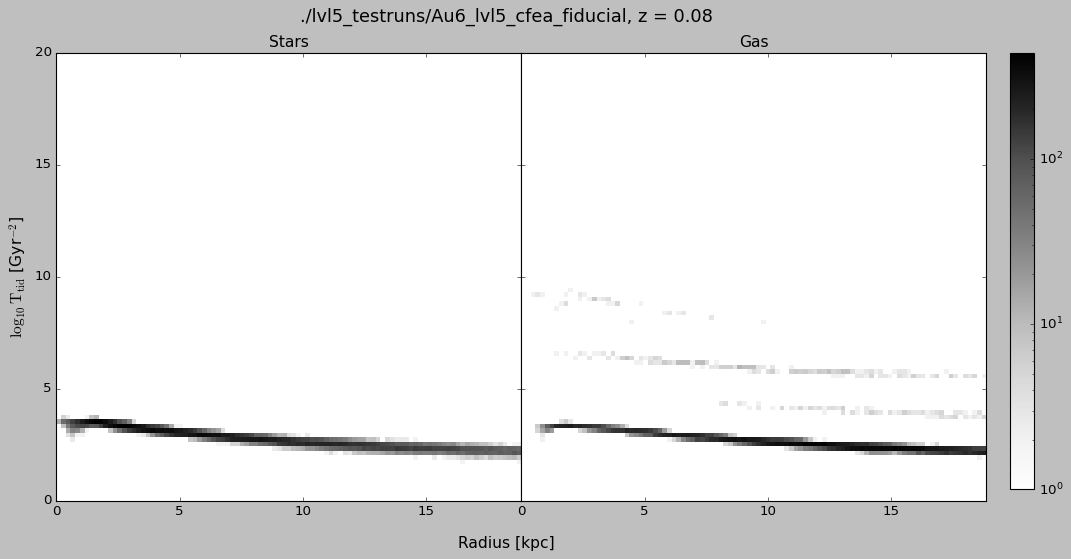

galrad= 0.01945979
Found 78325 stars.
Rotated pos.
Rotated bfld.
Rotated vel.
Redshift of the simulation: 0.00


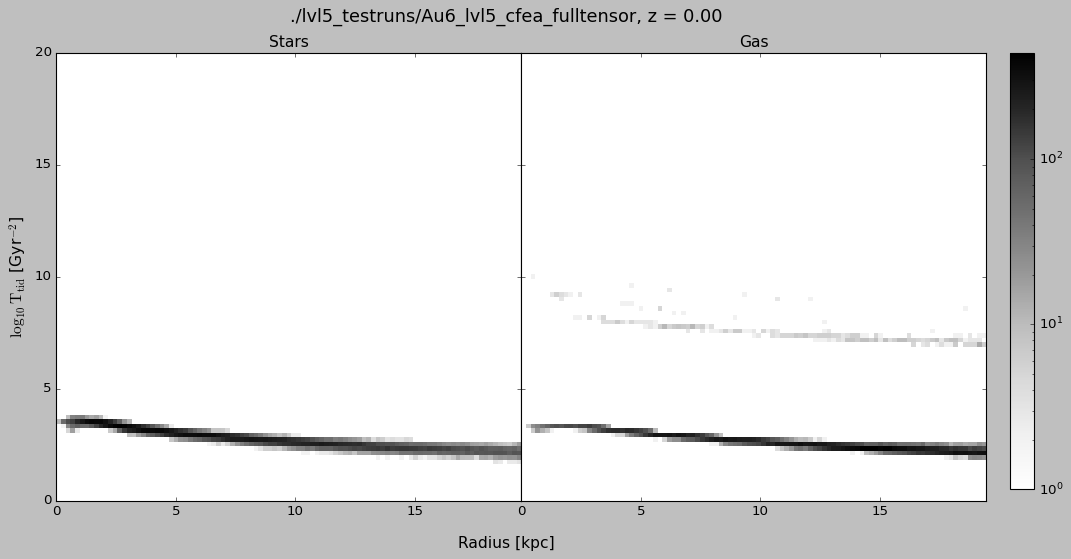

galrad= 0.01945979
Found 78325 stars.
Rotated pos.
Rotated bfld.
Rotated vel.
Redshift of the simulation: 0.00


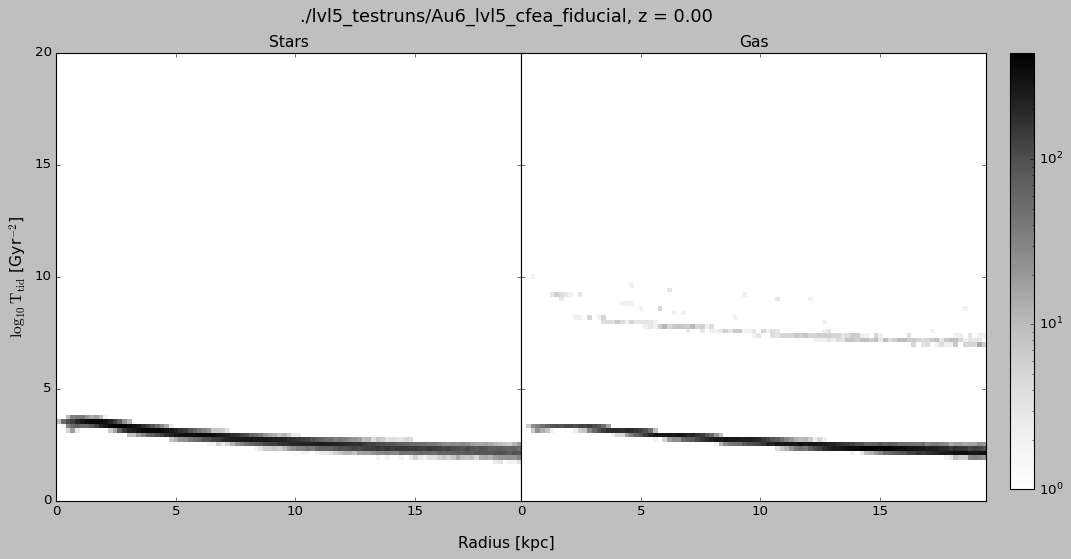

In [14]:
for i in snapshots:
    for sim in simulation:
        get_tidal_field_histogram(sim, i)

In [ ]:
TT_gas = []
eigenvals_gas = []
TT_stars = []
eigenvals_stars = []
for sim in simulation:
    sf = load_subfind(snapshots[-1], dir=simulation+'/output/', hdf5=True, loadonly=['fpos', 'frc2', 'svel', 'flty', 'fnsh', 'slty', 'spos', 'smty', 'ffsh'] )
    s = gadget_readsnap(snapshots[-1], snappath=simulation+'/output/', subfind=sf, hdf5=True, loadonlyhalo=0)
    s.calc_sf_indizes( sf )
    galrad = 0.1 * sf.data['frc2'][0]
    s.select_halo( sf, use_principal_axis=True, use_cold_gas_spin=False, do_rotation=True )

    print('Redshift of the simulation: {:2.2f}'.format(s.redshift))

    gyr = 1e9 * 365.25 * 24 * 3600
    s.parameters['UnitTime_in_s'] = s.parameters['UnitLength_in_cm'] / s.parameters['UnitVelocity_in_cm_per_s']
    s.data['ttij'] *= gyr**2 / s.parameters['UnitTime_in_s']**2
    if 'tlij' in s.data.keys():
        s.data['tlij'] *= gyr**2 / s.parameters['UnitTime_in_s']**2
    else:
        s.data['tlij'] = np.zeros_like(s.data['ttij'])

    gasparts = s.data['type'] == 0
    starparts = s.data['age'] > 0.
    
    TTij_g = (s.data['ttij']+s.data['tlij'])[gasparts]
    finitemask = np.isfinite(TTij_g)
    TTij_g = TTij_g[finitemask.all(axis=1)]
    r_g = s.r()[gasparts][finitemask.all(axis=1)]
    TT_gas.append(TTij_g)
    TTij_s = (s.data['ttij']+s.data['tlij'])[s.data['type']==4][starparts]
    finitemask = np.isfinite(TTij_s)
    TTij_s = TTij_s[finitemask.all(axis=1)]
    r_s = s.r()[s.data['type']==4][starparts][finitemask.all(axis=1)]
    TT_stars.append(TTij_s)
    
    TT_eig_g = np.zeros((len(TTij_g),3))
    TT_eig_s = np.zeros((len(TTij_s),3))

    TT_eig_g = np.linalg.eigvalsh(TTij_g.reshape(len(TTij_g),3,3))
    TT_eig_g = np.sort(TT_eig_g, axis=1)
    eigenvals_gas.append(TT_eig_g)
    TT_eig_s = np.linalg.eigvalsh(TTij_s.reshape(len(TTij_s),3,3))
    TT_eig_s = np.sort(TT_eig_s, axis=1)
    eigenvals_stars.append(TT_eig_s)

TT_g_diff = np.abs(TT_gas[0] - TT_gas[1])
eigenvals_g_diff = np.abs(eigenvals_gas[0] - eigenvals_gas[1])
TT_s_diff = np.abs(TT_stars[0] - TT_stars[1])
eigenvals_s_diff = np.abs(eigenvals_stars[0] - eigenvals_stars[1])

In [ ]:
fig, ax = plt.figure(3, 3, sharex=True, sharey=True, hspace=0, wspace=0)
for i in range(9):
    ax[i].scatter(r_g, TT_g_diff[:,i], c='b')
    ax[i].scatter(r_s, TT_s_diff[:,i], c='s')

In [ ]:
fig, ax = plt.figure(3, sharey=True, hspace=0, wspace=0)
for i in range(3):
    ax[i].scatter(r_g, eigenvals_g_diff[:,i], c='b')
    ax[i].scatter(r_s, eigenvals_s_diff[:,i], c='s')